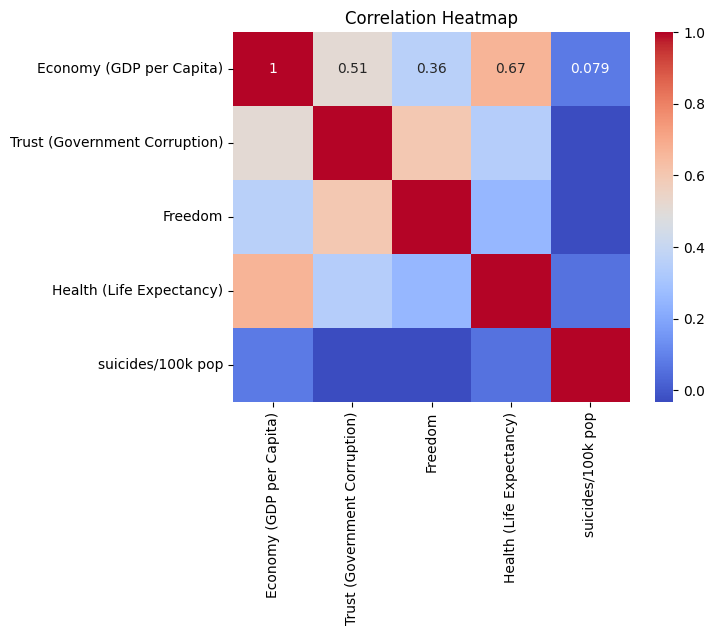

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
master_data = pd.read_csv('master.csv')
happy_data = pd.read_csv('2015happy-Copy1.csv')

# 提取master.csv中的自杀率数据
suicide_rate = master_data['suicides/100k pop']

# 合并两个数据集，按照国家进行匹配
merged_data = pd.merge(master_data, happy_data, on='country')

# 选择感兴趣的指数列，比如GDP、腐败程度、自由度、健康等
interest_columns = ['Economy (GDP per Capita)', 'Trust (Government Corruption)', 'Freedom', 'Health (Life Expectancy)']

# 计算相关系数
correlation_matrix = merged_data[interest_columns + ['suicides/100k pop']].corr()

# 绘制热力图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

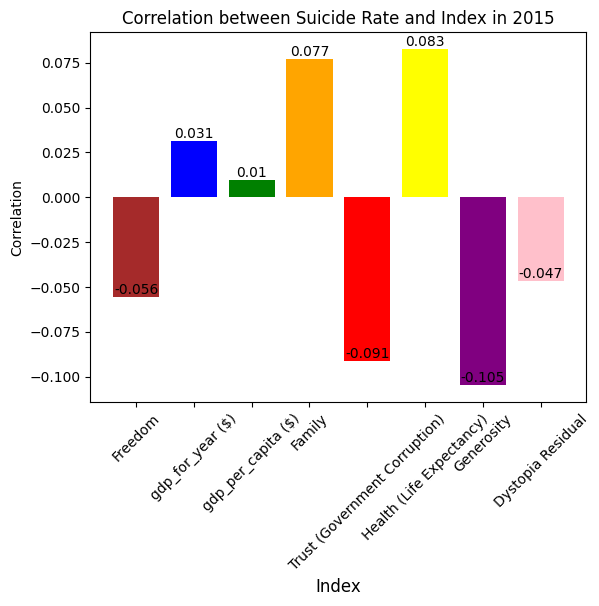

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

s_data = pd.read_csv('master.csv')
h_data = pd.read_csv('2015happy-Copy1.csv')


merged_data = pd.merge(s_data, h_data, on=['country','year'])

merged_data.to_csv('merged_data.csv',index=False)

merged_data3=pd.read_csv('merged_data.csv', dtype={'suicides/100k pop': float}, thousands=',')
suicide_rate = pd.to_numeric(merged_data3['suicides/100k pop'], errors='coerce')

variables = [ 'Freedom','gdp_for_year ($)','gdp_per_capita ($)','Family', 'Trust (Government Corruption)',  'Health (Life Expectancy)','Generosity','Dystopia Residual']

correlations = {}
for column in variables:
    correlation = merged_data3[column].corr(suicide_rate)
    correlations[column] = correlation
colors = ['brown','blue', 'green', 'orange', 'red','Yellow','purple','pink']

plt.bar(correlations.keys(), correlations.values(), color=colors)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Correlation')
plt.title('Correlation between Suicide Rate and Index in 2015')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
for i, val in enumerate(correlations.values()):
    plt.text(i, val, round(val, 3), ha='center', va='bottom')
plt.show()

In [22]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('HappySuicide_num.csv')

# 计算每个国家的平均自杀率
avg_suicide_rate_100k = df.groupby('country')['suicides.100k.pop'].mean()

# 将平均自杀率添加到数据框中的新列
df['avg_suicide_rate_100k'] = df['country'].map(avg_suicide_rate)

# 保存修改后的数据框回CSV文件
df.to_csv('HappySuicide_num.csv', index=False)

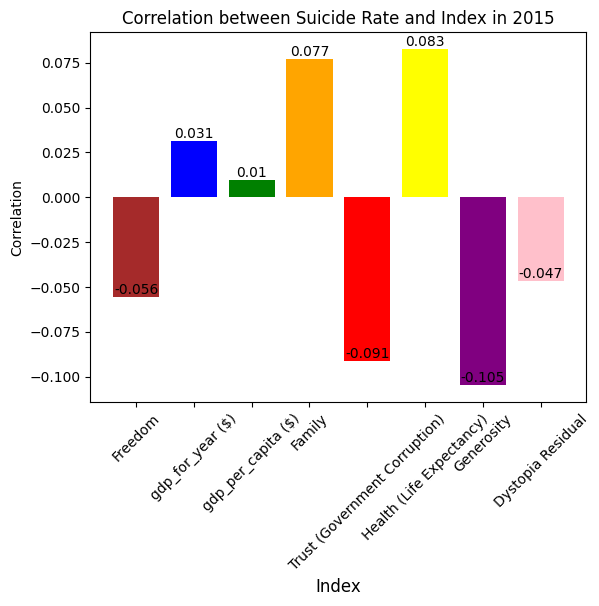

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

s_data = pd.read_csv('merged_data.csv', dtype={'suicides/100k pop': float}, thousands=',')

suicide_rate = pd.to_numeric(s_data['suicides/100k pop'], errors='coerce')

variables = ['Freedom','gdp_for_year ($)','gdp_per_capita ($)','Family', 'Trust (Government Corruption)',  'Health (Life Expectancy)','Generosity','Dystopia Residual']

correlations = {}
for column in variables:
    correlation = s_data[column].corr(suicide_rate)
    correlations[column] = correlation
colors = ['brown','blue', 'green', 'orange', 'red','Yellow','purple','pink']

plt.bar(correlations.keys(), correlations.values(), color=colors)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Correlation')
plt.title('Correlation between Suicide Rate and Index in 2015')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
for i, val in enumerate(correlations.values()):
    plt.text(i, val, round(val, 3), ha='center', va='bottom')
plt.show()

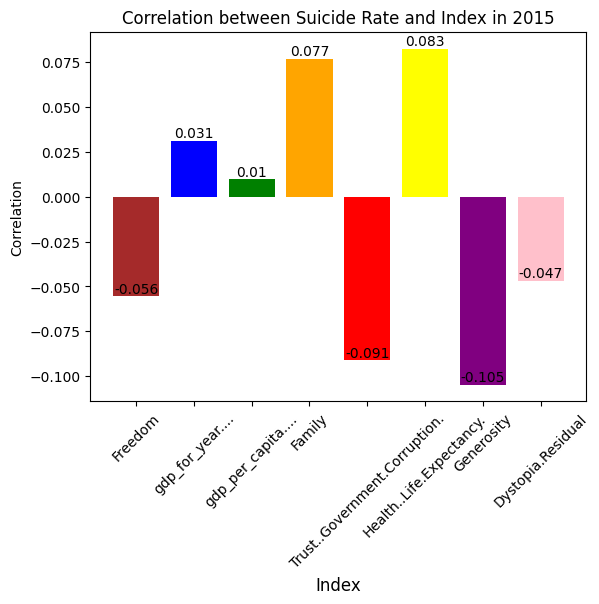

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

s_data = pd.read_csv('HappySuicide_num.csv', dtype={'suicides.100k.pop': float}, thousands=',')


suicide_rate = pd.to_numeric(s_data['suicides.100k.pop'], errors='coerce')



variables = ['Freedom','gdp_for_year....','gdp_per_capita....','Family', 'Trust..Government.Corruption.',  'Health..Life.Expectancy.','Generosity','Dystopia.Residual']

correlations = {}
for column in variables:
    correlation = s_data[column].corr(suicide_rate)
    correlations[column] = correlation
colors = ['brown','blue', 'green', 'orange', 'red','Yellow','purple','pink']

plt.bar(correlations.keys(), correlations.values(), color=colors)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Correlation')
plt.title('Correlation between Suicide Rate and Index in 2015')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
for i, val in enumerate(correlations.values()):
    plt.text(i, val, round(val, 3), ha='center', va='bottom')
plt.show()

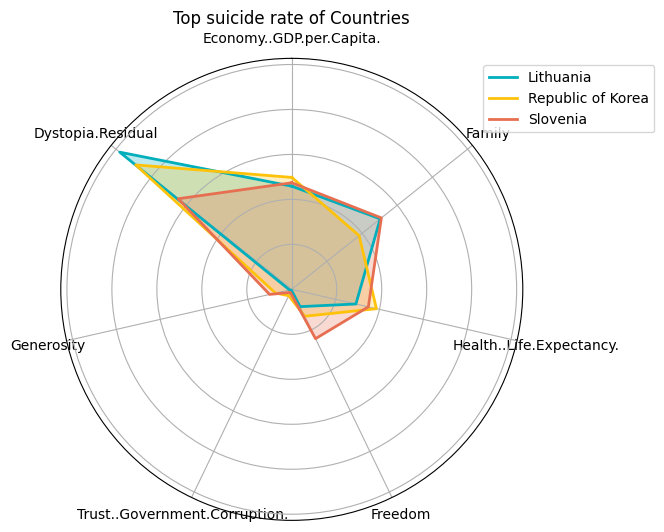

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('top_data.csv')
countries = data['country']
columns = data.columns[1:]

# 创建颜色列表
colors = ['#00AFBB', '#FFC20A', '#E76F51']

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False).tolist()
angles += angles[:1]

# 绘制每个国家的雷达图
for i, country in enumerate(countries):
    values = data.loc[i, columns].values.tolist()
    values += values[:1]

    ax.plot(angles, values, color=colors[i], linewidth=2, label=country)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# 设置雷达图的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)
ax.set_yticklabels([])

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# 设置标题
ax.set_title('Top suicide rate of Countries')

# 显示图形
plt.show()

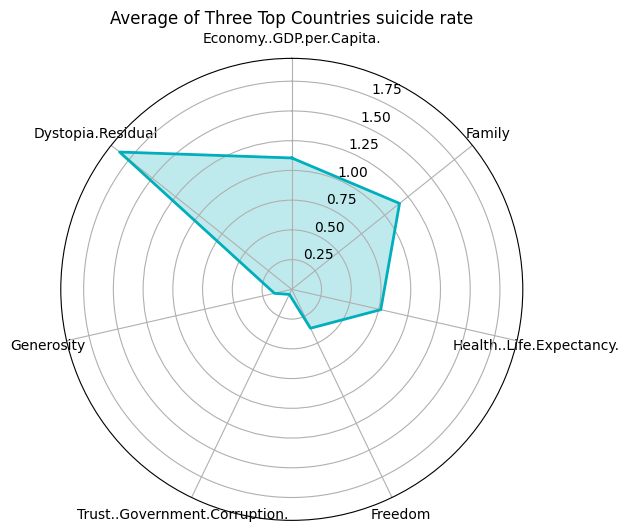

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('top10_data.csv')
columns = data.columns[1:]

# 计算每个维度的平均值
average_values = data[columns].mean()

# 创建颜色列表
color = '#00AFBB'

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

# 绘制雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

# 设置雷达图的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)

# 添加标题
ax.set_title('Average of Three Top Countries suicide rate')

# 显示图形
plt.show()

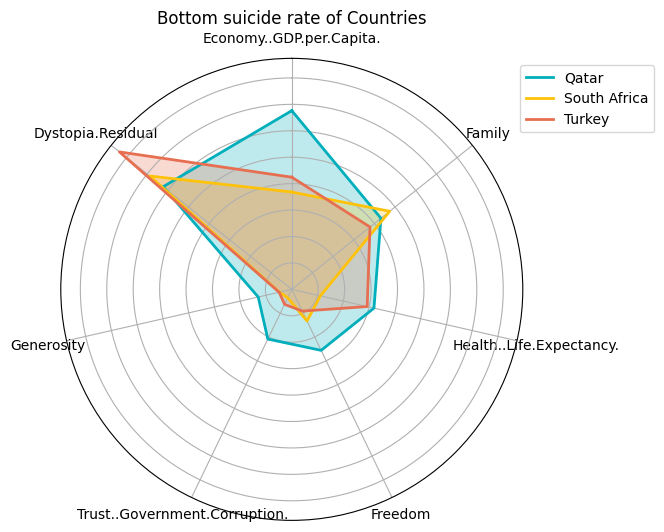

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('bottom_data.csv')
countries = data['country']
columns = data.columns[1:]

# 创建颜色列表
colors = ['#00AFBB', '#FFC20A', '#E76F51']

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False).tolist()
angles += angles[:1]

# 绘制每个国家的雷达图
for i, country in enumerate(countries):
    values = data.loc[i, columns].values.tolist()
    values += values[:1]

    ax.plot(angles, values, color=colors[i], linewidth=2, label=country)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# 设置雷达图的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)
ax.set_yticklabels([])

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# 设置标题
ax.set_title('Bottom suicide rate of Countries')

# 显示图形
plt.show()

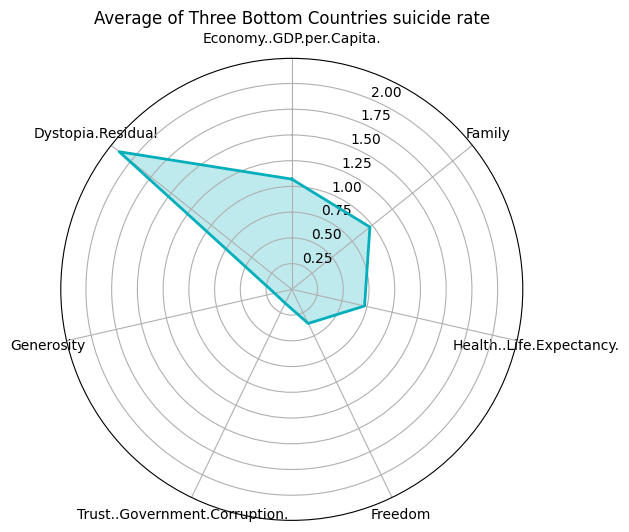

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('bottom10_data.csv')
columns = data.columns[1:]

# 计算每个维度的平均值
average_values = data[columns].mean()

# 创建颜色列表
color = '#00AFBB'

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

# 绘制雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

# 设置雷达图的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)

# 添加标题
ax.set_title('Average of Three Bottom Countries suicide rate')

# 显示图形
plt.show()

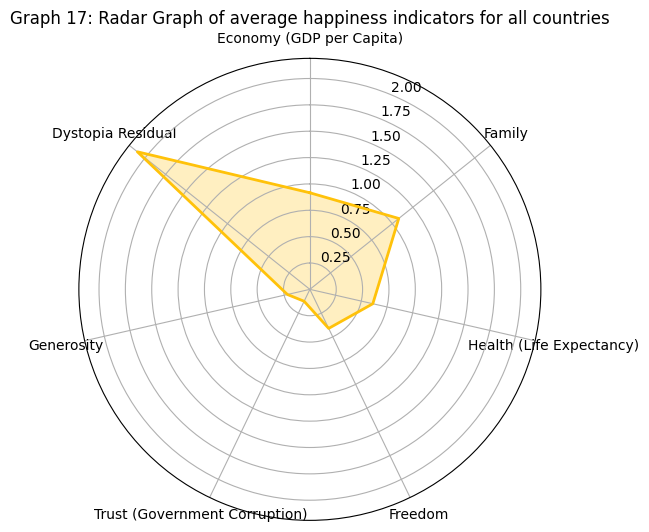

In [1]:
#所有国家的平均值

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('2015-2019.csv')
columns = data.columns[5:]

# 计算每个维度的平均值
average_values = data[columns].mean()

# 创建颜色列表
color = '#FFC20A'

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

# 绘制雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

# 设置雷达图的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)

# 添加标题
ax.set_title('Graph 17: Radar Graph of average happiness indicators for all countries')

# 显示图形
plt.show()

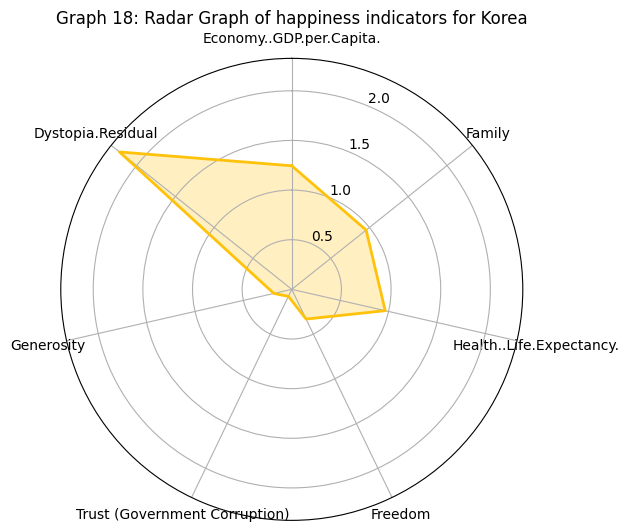

In [2]:
#所有国家的平均值

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('korea_data.csv')
columns = data.columns[1:]

# 计算每个维度的平均值
average_values = data[columns].mean()

# 创建颜色列表
color = '#FFC20A'

# 绘制雷达图
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 计算角度
num_vars = len(columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 调整平均值数据的维度
average_values = np.concatenate((average_values, [average_values[0]]))

# 绘制雷达图
ax.plot(angles, average_values, color=color, linewidth=2)
ax.fill(angles, average_values, color=color, alpha=0.25)

# 设置雷达图的标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(columns)

# 添加标题
ax.set_title('Graph 18: Radar Graph of happiness indicators for Korea')

# 显示图形
plt.show()